In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [56]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter1=None, vcenter2=None, vcenter3=None, vcenter4=None, vcenter5=None, clip=False):
        self.vcenter1 = vcenter1
        self.vcenter2 = vcenter2
        self.vcenter3 = vcenter3
        self.vcenter4 = vcenter4
        self.vcenter5 = vcenter5
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        # Note also that we must extrapolate beyond vmin/vmax
        x, y = [self.vmin, self.vcenter1, self.vcenter2, self.vcenter3, self.vcenter4, self.vcenter5, self.vmax], [0, 0.16, 0.32, 0.48, 0,64, 0.8, 1]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter1, self.vcenter2, self.vcenter3, self.vcenter4, self.vcenter5, self.vmax], [0, 0.16, 0.32, 0.48, 0,64, 0.8, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)

font = {'fontname':'Times New Roman',
       'size': 9}

In [57]:
data1 = pd.read_csv('/kaggle/input/normalized-new/normalized.csv', delimiter=';', decimal=',', header=0, index_col=0)
data2 = pd.read_csv('/kaggle/input/normalized-new/normalized2.csv', delimiter=';', decimal=',', header=0, index_col=0)
npdata1 = np.array(data1)
npdata2 = np.array(data2)
x=np.array(np.arange(0, 7, 1))
y=np.array(np.arange(0, 9, 1))
X, Y = np.meshgrid(x, y)
Z = npdata1[:,:-1]

ValueError: fp and xp are not of the same length.

<Figure size 1800x1200 with 0 Axes>

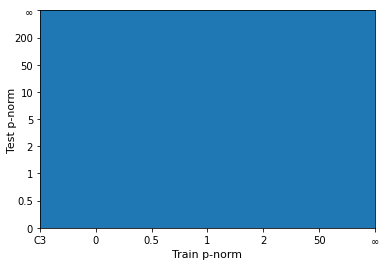

In [58]:
#2D plot for normalized Lp norm corruption training and test

midnorm1 = MidpointNormalize(vmin=65, vcenter1=82, vcenter2=84, vcenter3=86, vcenter4=88, vcenter5=90, vmax=100)
font = {'size':11}

bild2 = plt.figure(figsize=[6,4], dpi=300)
bild2, ax = plt.subplots(1,1)
ax.set_xlabel('Train p-norm', fontdict=font, labelpad=+4)
ax.set_ylabel('Test p-norm', fontdict=font, labelpad=-3)

plt.xticks(np.arange(0, 7, 1), ('C3', '0', '0.5', '1', '2', '50', r"$\infty$"))
plt.yticks(np.arange(0, 9, 1), ('0', '0.5', '1', '2', '5', '10', '50', '200', r"$\infty$"))

plot = plt.contourf(X, Y, Z, cmap='viridis', levels=200, norm = midnorm1)

ax.tick_params(axis='both', which='major', labelsize=11, pad=+5)
ax.tick_params(axis='both', which='minor', labelsize=11, pad=+5)

bild2.colorbar(plot, ticks=[50, 60, 70, 80, 90, 100], label='Normalized Accuracy', pad = 0.03) # Add a colorbar to a plot

bild2.savefig("2d-pnorm-generalization.pdf",dpi=300)
bild2.savefig("2d-pnorm-generalization.png",dpi=300)

In [ ]:
#learning curve visualization

import numpy as np
train1 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_train_standard_0.0_True_run_0.csv', delimiter=';')
train2 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_train_combined_1_concurrent_1_run_0.csv', delimiter=';')
train3 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_train_combined_0_concurrent_1_run_0.csv', delimiter=';')
train4 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_train_combined_0_concurrent_2_run_1.csv', delimiter=';')
valid1 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_valid_standard_0.0_True_run_0.csv', delimiter=';')
valid2 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_valid_combined_1_concurrent_1_run_0.csv', delimiter=';')
valid3 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_valid_combined_0_concurrent_1_run_0.csv', delimiter=';')
valid4 = np.loadtxt(f'/kaggle/input/learning-curves/learning_curve_valid_combined_0_concurrent_2_run_1.csv', delimiter=';')

font1 = {'size':12}
font2 = {'size':10}

plt.figure(figsize=[6,7])
x = list(range(1, len(train1) + 1))
plt.plot(x, train1, label='Standard Train', color='green', linestyle='dashed')
plt.plot(x, valid1, label='Standard Validation', color='green')
plt.plot(x, train4, label='C1C2 Train', color='blue', linestyle='dashed')
plt.plot(x, valid4, label='C1C2 Validation', color='blue')
plt.plot(x, train3, label='TA Train', color='red', linestyle='dashed')
plt.plot(x, valid3, label='TA Validation', color='red')
plt.plot(x, train2, label='TA+L0(0.01) Train', color='black', linestyle='dashed')
plt.plot(x, valid2, label='TA+L0(0.01) Validation', color='black')


plt.xlabel('Epochs', fontdict=font1)
plt.ylim(70, 100)
plt.ylabel('Accuracy', fontdict=font1, labelpad=-2)
plt.xticks(np.arange(0, len(train1) + 1, (len(train1)) / 10))
plt.legend(loc='best')

plt.savefig('learning-curves.pdf')

In [ ]:
#learning curve visualization

import numpy as np
train1 = np.genfromtxt('/kaggle/input/tinyin-learning-curves-csv/config79_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
train2 = np.genfromtxt('/kaggle/input/tinyin-learning-curves-csv/config80_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
train3 = np.genfromtxt('/kaggle/input/tinyin-learning-curves-csv/config89_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
valid1 = np.genfromtxt('/kaggle/input/tinyin-learning-curves-csv/config79_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 2, delimiter=';', skip_header=1)
valid2 = np.genfromtxt('/kaggle/input/tinyin-learning-curves-csv/config80_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', usecols = 2, delimiter=';', skip_header=1)
valid3 = np.genfromtxt('/kaggle/input/tinyin-learning-curves-csv/config89_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 2, delimiter=';', skip_header=1)



font1 = {'size':12}
font2 = {'size':10}

plt.figure(figsize=[6,7])
x = list(range(1, len(train1) + 1))
plt.plot(x, train1, label='Standard Train', color='green', linestyle='dashed')
plt.plot(x, valid1, label='Standard Validation', color='green')
plt.plot(x, train2, label='C1 Train', color='blue', linestyle='dashed')
plt.plot(x, valid2, label='C1 Validation', color='blue')
plt.plot(x, train3, label='TA Train', color='black', linestyle='dashed')
plt.plot(x, valid3, label='TA Validation', color='black')


plt.xlabel('Epochs', fontdict=font1)
plt.ylim(10, 100)
plt.ylabel('Accuracy', fontdict=font1, labelpad=-2)
plt.xticks(np.arange(0, len(train1) + 1, (len(train1)) / 10))
plt.legend(loc='best')

plt.savefig('learning-curves-TIN.pdf')

In [ ]:
#learning curve visualization

import numpy as np
train1 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config40_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
train2 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config41_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
train3 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config50_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
train4 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config51_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', usecols = 0, delimiter=';', skip_header=1)
valid1 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config40_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 2, delimiter=';', skip_header=1)
valid2 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config41_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', usecols = 2, delimiter=';', skip_header=1)
valid3 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config50_CosineAnnealingWarmRestarts_separate_learning_curve_standard_eps_0.0_False_run_0.csv', usecols = 2, delimiter=';', skip_header=1)
valid4 = np.genfromtxt('/kaggle/input/cifar100-learning-curves/config51_CosineAnnealingWarmRestarts_combined_learning_curve_run_0.csv', usecols = 2, delimiter=';', skip_header=1)

font1 = {'size':12}
font2 = {'size':10}

plt.figure(figsize=[6,7])
x = list(range(1, len(train1) + 1))
plt.plot(x, train1, label='Standard Train', color='green', linestyle='dashed')
plt.plot(x, valid1, label='Standard Validation', color='green')
plt.plot(x, train2, label='C1 Train', color='blue', linestyle='dashed')
plt.plot(x, valid2, label='C1 Validation', color='blue')
plt.plot(x, train3, label='TA Train', color='black', linestyle='dashed')
plt.plot(x, valid3, label='TA Validation', color='black')
plt.plot(x, train4, label='TA+C1 Train', color='red', linestyle='dashed')
plt.plot(x, valid4, label='TA+C1 Validation', color='red')


plt.xlabel('Epochs', fontdict=font1)
plt.ylim(30, 100)
plt.ylabel('Accuracy', fontdict=font1, labelpad=-2)
plt.xticks(np.arange(0, len(train1) + 1, (len(train1)) / 10))
plt.legend(loc='best')

plt.savefig('learning-curves-new.pdf')